# Evaluation of Unique Keystroke Behaviors by Number of Users and Size of Window

This work is used to evaluate the unique keystroke behaviors of users in a given window.  

### Data
The University of Buffalo data was used in this study because the format of the data includes 'key', 'action' (key up or down), and timestamp and did not need to be processed. The data was from sessions where a Lenovo Keyboard was used.  The top ten non-alpha numeric keys were used.  Spaces and Returns were removed from the dataset as that is text-type specific.  In total there were 6,000 actions used for both training and testing.

### Unique Behaviors
The data was processed into the following unique behaviors:
- 1 Words per Minute
- 2 Negative Up-Downs Rate
- 3 Negative Up-Ups Rate
- 4 Error Rate
- 5 Caps Lock Rate
- 6 Left Menu Rate
- 7 Left Arrow Key Rate
- 8 Right Arrow Key Rate
- 9 Up Arrow Key Rate
- 10 Tab Key Rate
- 11 Left Shift Key Rate
- 12 Right Shift Key Rate
- 13 Left Control Key Rate
- 14 Copy Text Rate
- 15 Paste Text Rate

### Window Size
Window sizes of between 100 and 900 were tested in 100 action increments.

### Number of Users
Between 2 and 8 number of users were tested.

### Metric
The f1 score was used to compare the model predictions.

### Cross-Validation and Model
Up to 3 folds of cross validation was used with a Random Forest Model.  The model was not optimized.







In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from dask.distributed import Client
import dask
import itertools

from model_weird_behavior.import_data import read_baseline_files_to_dataframes
from model_weird_behavior.parallelize_model_testing import process_combo

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'model_weird_behavior.parallelize_model_testing'

## Read in Data

In [2]:

root_path = "/Users/kimkraunz/Library/CloudStorage/GoogleDrive-kim@mimoto.ai/Shared drives/ML/data/public_data/keystrokes/UB_keystroke_dataset"
dataframes = read_baseline_files_to_dataframes(root_path)
df = pd.concat(dataframes.values())

## Set user_id_column

In [3]:
# Usage
user_id_column = 'user_id'  # Replace with your actual user ID column nameSet the desired number of rows per user


## Run Model Testing for Non-Similar Keystroke Dynamics by Window Size and Number of Users

In [19]:

client = Client()  # Set up Dask client

rows_per_user = 6000
users_to_test = [1, 2, 5, 6, 8, 10, 13, 14]
window_sizes = np.arange(100, 1000, 100)

all_user_combos = []
for length in range(2, len(users_to_test) + 1):
    all_user_combos.extend(itertools.combinations(users_to_test, length))

Client(threads_per_worker=2)
delayed_calcs = [dask.delayed(process_combo)(comb, df, rows_per_user, window_sizes, user_id_column) for comb in all_user_combos]

results_nonsimilar = dask.compute(*delayed_calcs)
results_nonsimilar = [item for sublist in results_nonsimilar for item in sublist]

results_nonsimilar1 = pd.DataFrame(results_nonsimilar, columns=['users', 'n_users', 'w', 'f1'])

KeyboardInterrupt: 

## Run Model Testing for Similar Keystroke Dynamics by Window Size and Number of Users

In [6]:

client = Client()  # Set up Dask client

rows_per_user = 6000
users_to_test = [3, 7, 9, 11, 12, 15, 2, 13]
window_sizes = np.arange(100, 1000, 100)

all_user_combos = []
for length in range(2, len(users_to_test) + 1):
    all_user_combos.extend(itertools.combinations(users_to_test, length))

Client(threads_per_worker=2)
delayed_calcs = [dask.delayed(process_combo)(comb, df, rows_per_user, window_sizes, user_id_column) for comb in all_user_combos]

results_similar = dask.compute(*delayed_calcs)
results_similar = [item for sublist in results_similar for item in sublist]

results_similar1 = pd.DataFrame(results_similar, columns=['users', 'n_users', 'w', 'f1'])

2024-08-16 15:01:47,598 - distributed.nanny - ERROR - Worker process died unexpectedly


## Plot the Relationship between F1 Score and Number of Users and Window Size for Unique Keystroke Behavior Models
### These users canbe classified using deltas and hold times

Text(0.5, 1.0, 'F1 Score vs. Window Size For Users Combos That are Difficult to Classify')

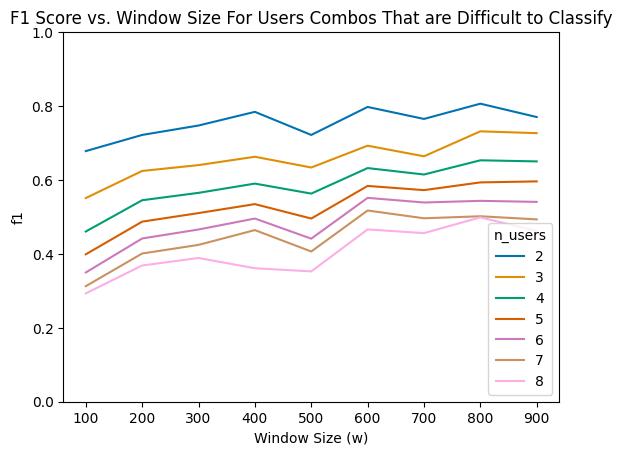

In [17]:

sns.lineplot(data=results_similar1, x='w', y='f1', hue='n_users', errorbar=None, palette='colorblind')
plt.xlabel('Window Size (w)')
plt.ylim(0, 1)
plt.title('F1 Score vs. Window Size For Users Combos That are Difficult to Classify')

## Plot the Relationship between F1 Score and Number of Users and Window Size for Unique Keystroke Behavior Models
### These users that have been difficult to classify using deltas and hold times

Text(0.5, 1.0, 'F1 Score vs. Window Size For Users Combos (non-similar)')

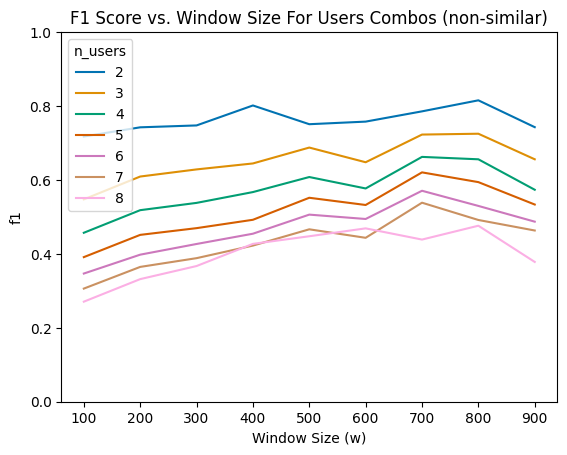

In [15]:
sns.lineplot(data=results_nonsimilar1, x='w', y='f1', hue='n_users', errorbar=None, palette='colorblind')
plt.xlabel('Window Size (w)')
plt.ylim(0, 1)
plt.title('F1 Score vs. Window Size For Users Combos (non-similar)')